# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a un dataset concreto

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [10]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [72]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [73]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [74]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


En este punto, puedes hacer cualquier otro análisis exploratorio que creas conveniente.

In [11]:
pip install matplotlib

   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ----------------------------------- ---- 7.3/8.3 MB 36.9 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 36.6 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 76.8 MB/s  0:00:00
   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   ---------------------------------------- 7.2/7.2 MB 97.4 MB/s  0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----------- ---------------------------- 2/7 [kiwisolver]
   ----------------- ---------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [27]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------------------- - 7.9/8.1 MB 41.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 39.6 MB/s  0:00:00
   ---------------------------------------- 0.0/37.1 MB ? eta -:--:--
   ------------------------ --------------- 22.8/37.1 MB 110.7 MB/s eta 0:00:01
   ---------------------------------------- 37.1/37.1 MB 98.0 MB/s  0:00:00

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [

A continuación, crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en millas por galón) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo, pero usa los parámetros que quieras en cuanto a color de los puntos, grids etc.

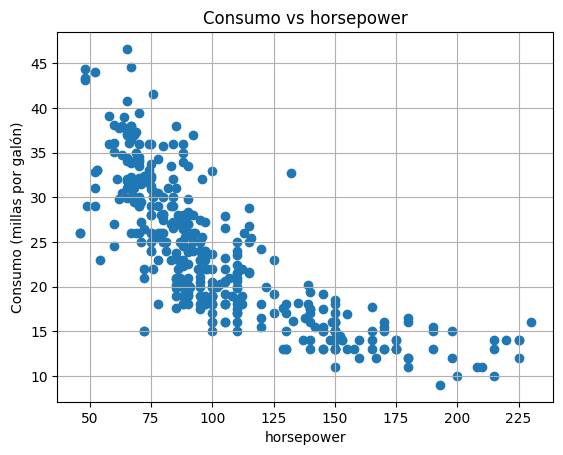

In [12]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    plt.figure()
    plt.scatter(df[nombre_columna], y)
    plt.xlabel(nombre_columna)
    plt.ylabel("Consumo (millas por galón)")
    plt.title(f"Consumo vs {nombre_columna}")
    plt.grid(True)
    plt.show()
    

visualiza(X, y, 'horsepower')

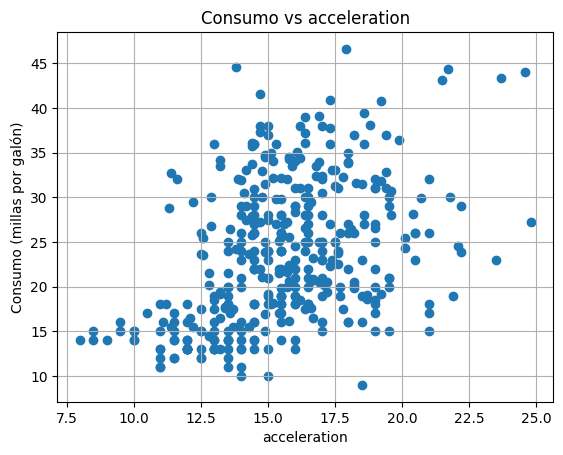

In [13]:
visualiza(X, y, 'acceleration')

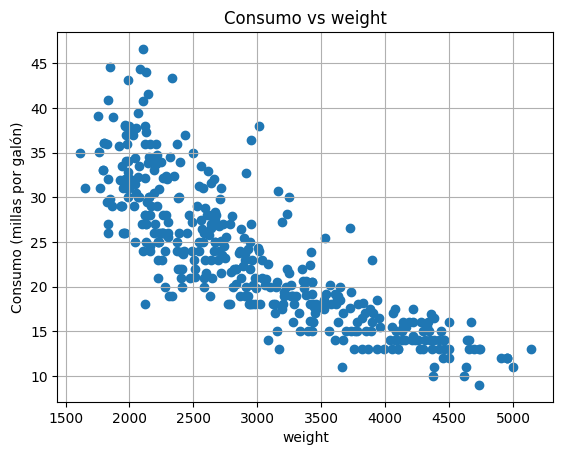

In [14]:
visualiza(X, y, 'weight')

IMPORTANTE: Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

En este punto vamos a dar un paso atrás y olvidarnos de los datos de consumo por un momento, porque el algoritmo que vamos a implementar serviría para cualquier conjunto de datos.

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, lo mostramos por pantalla y salimos de la función. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [ ]:
import numpy as np

def pesos_ols(X, y):
    X_arr = np.array(X, dtype=float)
    y_arr = np.array(y, dtype=float)
    N, d = X_arr.shape
    if d > N:
        print(f"Error: El dataset tiene más features ({d}) que observaciones ({N}).")
        print("Los resultados no serían fiables.")
        return None
    X_b = np.c_[np.ones((N, 1)), X_arr]
    try:
        X_T = X_b.T
        inverse_XTX = np.linalg.inv(X_T @ X_b)
        w_hat = inverse_XTX @ X_T @ y_arr
        return w_hat
    except np.linalg.LinAlgError:
        print("Error: La matriz (X^T X) no es invertible (es singular).")
        return None

In [96]:
# Arrays de prueba!! No son dataset reales y no hace falta que los dibujemos
X_prueba = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y_prueba = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X_prueba, y_prueba)

Error: El dataset tiene más features (10) que observaciones (2).
Los resultados no serían fiables.


In [97]:
X_prueba = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]]).reshape(10,2)
y_prueba = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X_prueba, y_prueba)

array([ 1.98968523e+05,  7.36278026e+01, -8.63759760e+01])

Hasta aquí hemos implementado el algoritmo de mínimos cuadrados y lo hemos probado en un array de tamaño 2x10, pero aún no lo hemos probado con ningún dataset real. 

### 1.3 Prueba del modelo en los datos de consumo de coches

Ahora sí, ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

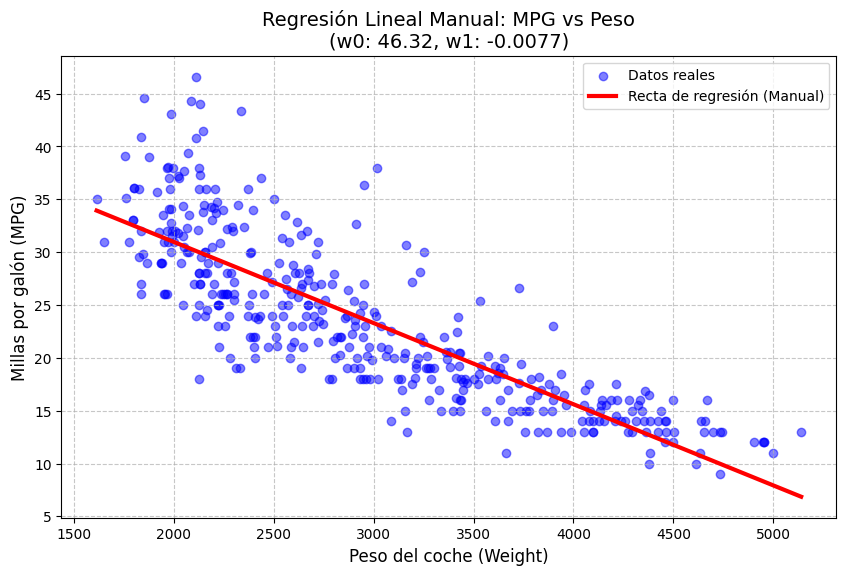

In [ ]:
import pandas as pd
X_weight = X[['weight']].values
y_vals = y.values
mask = ~np.isnan(X_weight).any(axis=1) & ~np.isnan(y_vals).any(axis=1)
X_clean = X_weight[mask]
y_clean = y_vals[mask]
w_hat = pesos_ols(X_clean, y_clean)
X_range = np.linspace(X_clean.min(), X_clean.max(), 100).reshape(-1, 1)
X_range_b = np.c_[np.ones((100, 1)), X_range]
y_range_pred = X_range_b @ w_hat

plt.figure(figsize=(10, 6))
plt.scatter(X_clean, y_clean, color='blue', alpha=0.5, label='Datos reales')
plt.plot(X_range, y_range_pred, color='red', linewidth=3, label='Recta de regresión (Manual)')
intercepto = w_hat[0][0]
pendiente = w_hat[1][0]

plt.title(f'Regresión Lineal Manual: MPG vs Peso\n(w0: {intercepto:.2f}, w1: {pendiente:.4f})', fontsize=14)
plt.xlabel('Peso del coche (Weight)', fontsize=12)
plt.ylabel('Millas por galón (MPG)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

c:\Users\samue\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


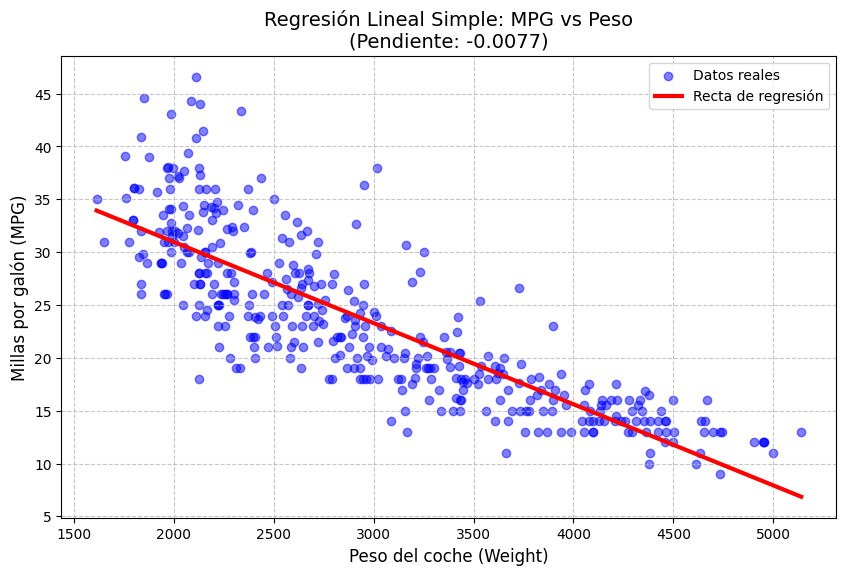

In [143]:
from sklearn.linear_model import LinearRegression
X_plot = X[['weight']].values
y_plot = y.values
X_range = np.linspace(X_plot.min(), X_plot.max(), 100).reshape(-1, 1)
y_range_pred = lr.predict(X_range)
plt.figure(figsize=(10, 6))
plt.scatter(X_plot, y_plot, color='blue', alpha=0.5, label='Datos reales')
plt.plot(X_range, y_range_pred, color='red', linewidth=3, label='Recta de regresión')
plt.title(f'Regresión Lineal Simple: MPG vs Peso\n(Pendiente: {lr.coef_[0][0]:.4f})', fontsize=14)
plt.xlabel('Peso del coche (Weight)', fontsize=12)
plt.ylabel('Millas por galón (MPG)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn (solo hay que ver si coincide o no para saber si te has equivocado en algún punto). Si coincide, ¡enhorabuena! Ya sabes implementar tu primer modelo de Machine Learning desde la base.

Pesos manuales (intercepto, pendiente): [130. 165. 150. 150. 140. 198. 220. 215. 225. 190. 170. 160. 150. 225.
  95.  95.  97.  85.  88.  46.  87.  90.  95. 113.  90. 215. 200. 210.
 193.  88.  90.  95.  nan 100. 105. 100.  88. 100. 165. 175. 153. 150.
 180. 170. 175. 110.  72. 100.  88.  86.  90.  70.  76.  65.  69.  60.
  70.  95.  80.  54.  90.  86. 165. 175. 150. 153. 150. 208. 155. 160.
 190.  97. 150. 130. 140. 150. 112.  76.  87.  69.  86.  92.  97.  80.
  88. 175. 150. 145. 137. 150. 198. 150. 158. 150. 215. 225. 175. 105.
 100. 100.  88.  95.  46. 150. 167. 170. 180. 100.  88.  72.  94.  90.
  85. 107.  90. 145. 230.  49.  75.  91. 112. 150. 110. 122. 180.  95.
  nan 100. 100.  67.  80.  65.  75. 100. 110. 105. 140. 150. 150. 140.
 150.  83.  67.  78.  52.  61.  75.  75.  75.  97.  93.  67.  95. 105.
  72.  72. 170. 145. 150. 148. 110. 105. 110.  95. 110. 110. 129.  75.
  83. 100.  78.  96.  71.  97.  97.  70.  90.  95.  88.  98. 115.  53.
  86.  81.  92.  79.  83. 140. 150. 1

### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



Minimos cuadrados se utiliza cuando puedes almacenar todos los datos ya que apareces en el punto mas bajo es exacto e instantaneo, mientras que descenso de gradiente tienes que ir dando pasos ya que solo puedes sentir la pendiente es bueno para trabajar con volumenes de datos mayores.

## 2. Optimización con descenso del gradiente

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

Iteración 1: Mejora de 203.695461
Iteración 2: Mejora de 124.689817
Iteración 3: Mejora de 76.346617
Iteración 4: Mejora de 46.765579
Iteración 5: Mejora de 28.664993
Iteración 6: Mejora de 17.589226
Iteración 7: Mejora de 10.811903
Iteración 8: Mejora de 6.664771
Iteración 9: Mejora de 4.127038
Iteración 10: Mejora de 2.574086
Iteración 11: Mejora de 1.623716
Iteración 12: Mejora de 1.042063
Iteración 13: Mejora de 0.686026
Iteración 14: Mejora de 0.468041
Iteración 15: Mejora de 0.334531
Iteración 16: Mejora de 0.252711
Iteración 17: Mejora de 0.202520
Iteración 18: Mejora de 0.171682
Iteración 19: Mejora de 0.152687
Iteración 20: Mejora de 0.140939
Iteración 21: Mejora de 0.133626
Iteración 22: Mejora de 0.129027
Iteración 23: Mejora de 0.126088
Iteración 24: Mejora de 0.124166
Iteración 25: Mejora de 0.122867
Iteración 26: Mejora de 0.121949
Iteración 27: Mejora de 0.121264
Iteración 28: Mejora de 0.120723
Iteración 29: Mejora de 0.120269
Iteración 30: Mejora de 0.119870
Iteración 

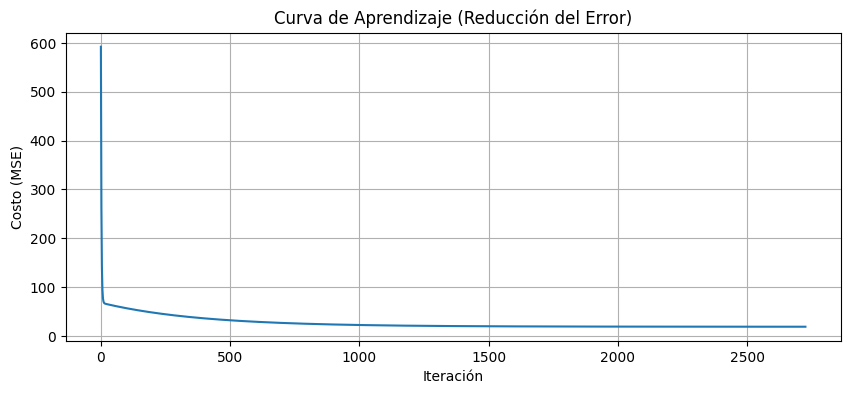

In [ ]:
import numpy as np
def gradient_descent(X, y, w0, n_iter, eta, tol=0.1): 
    loss_iter = []
    w_iter = [w0.copy()]
    w = w0.copy()
    
    N = len(y)
    X_b = np.c_[np.ones((N, 1)), X]
    for i in range(n_iter):
        y_hat = X_b @ w
        error = y_hat - y
        loss = (1/N) * np.sum(error**2)
        loss_iter.append(loss)
        if i > 0:
            diferencia_error = abs(loss_iter[-2] - loss_iter[-1])
            print(f"Iteración {i}: Mejora de {diferencia_error:.6f}")
            if diferencia_error < tol:
                print(f"Detenido por convergencia en la iteración {i}")
                break
        gradient = (2/N) * (X_b.T @ error)
        w = w - eta * gradient
        w_iter.append(w.copy())
        
    return np.array(w_iter), np.array(loss_iter)

X_real = X_clean.copy()
y_real = y_clean.copy()

# Como el peso es muy grande, dividimos entre 10000 para no usar un eta muy bajo
X_scaled = X_real / 10000 

eta = 0.1 
iteraciones = 10000
tol = 0.0001

np.random.seed(42)
w0_real = np.random.randn(2, 1)
weights_history, loss_history = gradient_descent(X_scaled, y_real, w0_real, iteraciones, eta, tol=tol)
w_final = weights_history[-1]
intercepto_gd = w_final[0][0]

pendiente_gd = w_final[1][0] / 1000 

print(f"--- Resultados Finales ---")
print(f"Intercepto (w0): {intercepto_gd:.4f}  (Debería ser ~46.2)")
print(f"Pendiente (w1): {pendiente_gd:.6f} (Debería ser ~-0.0076")

plt.figure(figsize=(10, 4))
plt.plot(loss_history)
plt.title('Curva de Aprendizaje (Reducción del Error)')
plt.xlabel('Iteración')
plt.ylabel('Costo (MSE)')
plt.grid(True)
plt.show()

### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [137]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

Iteración 1: Mejora de 205.272251
Iteración 2: Mejora de 131.374241
Iteración 3: Mejora de 84.079514
Iteración 4: Mejora de 53.810889
Iteración 5: Mejora de 34.438969
Iteración 6: Mejora de 22.040940
Iteración 7: Mejora de 14.106202
Iteración 8: Mejora de 9.027969
Iteración 9: Mejora de 5.777900
Iteración 10: Mejora de 3.697856
Iteración 11: Mejora de 2.366628
Iteración 12: Mejora de 1.514642
Iteración 13: Mejora de 0.969371
Iteración 14: Mejora de 0.620397
Iteración 15: Mejora de 0.397054
Iteración 16: Mejora de 0.254115
Iteración 17: Mejora de 0.162633
Iteración 18: Mejora de 0.104085
Iteración 19: Mejora de 0.066615
Iteración 20: Mejora de 0.042633
Iteración 21: Mejora de 0.027285
Iteración 22: Mejora de 0.017463
Iteración 23: Mejora de 0.011176
Iteración 24: Mejora de 0.007153
Iteración 25: Mejora de 0.004578
Iteración 26: Mejora de 0.002930
Iteración 27: Mejora de 0.001875
Iteración 28: Mejora de 0.001200
Iteración 29: Mejora de 0.000768
Iteración 30: Mejora de 0.000492
Iteración 

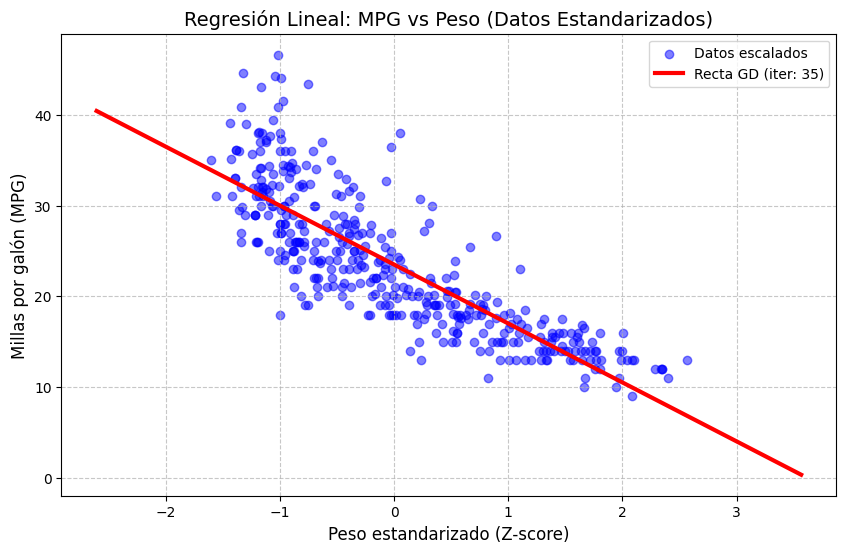

Pesos finales en escala estandarizada: Intercepto=23.5029, Pendiente=-6.4895


In [142]:
X = auto_mpg.data.features
y = auto_mpg.data.targets
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()
X_gd = (X_np - X_np.mean()) / X_np.std()
y_gd = y_np
np.random.seed(42)
w0_inicial = np.random.randn(2, 1) 
eta = 0.1                         
iteraciones = 1000                 
tolerancia = 0.0001                
weights_history, loss_history = gradient_descent(X_gd, y_gd, w0_inicial, iteraciones, eta, tol=tolerancia)
w_final = weights_history[-1]
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) - 1
x_recta = np.linspace(x_min, x_max, 100).reshape(-1, 1)
x_recta_b = np.c_[np.ones((100, 1)), x_recta]
y_recta = x_recta_b @ w_final
plt.figure(figsize=(10, 6))
plt.scatter(X_gd, y_gd, color='blue', alpha=0.5, label='Datos escalados')
plt.plot(x_recta, y_recta, color='red', linewidth=3, label=f'Recta GD (iter: {len(loss_history)})')
plt.title('Regresión Lineal: MPG vs Peso (Datos Estandarizados)', fontsize=14)
plt.xlabel('Peso estandarizado (Z-score)', fontsize=12)
plt.ylabel('Millas por galón (MPG)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

print(f"Pesos finales en escala estandarizada: Intercepto={w_final[0][0]:.4f}, Pendiente={w_final[1][0]:.4f}")